Sistemde verilen dataset birebir olarak Kaggle üzerinden bulunup csv formatında kullanılmıştır. Sütun isimlerinin eklenmesi dışında üzerinde hiçbir oynama yoktur.

Talha Taşlı - 20040101013 - Bilgisayar Mühendisliği - Makine Öğrenmesi Final Ödev

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv("diabetes.csv")

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Eğer kayıp değer varsa
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pd.DataFrame(X_scaled, columns=X.columns).head()

#Veri seti Pandas DataFrame olarak okundu. 
#Özellikler ve hedef değişken ayrıldı. Eksik değerler ortalama ile dolduruldu ve özellikler standartlaştırıldı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


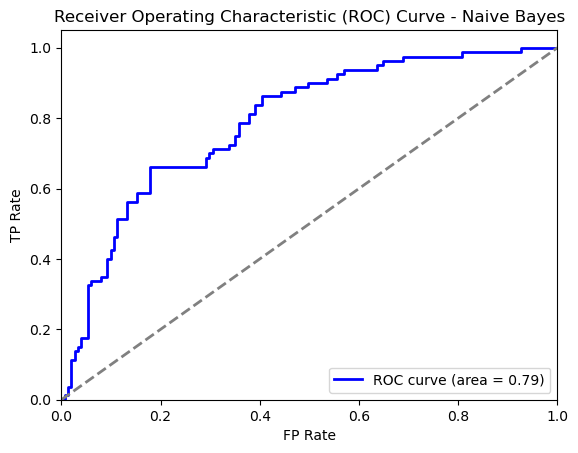

(array([[119,  32],
        [ 27,  53]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.79      0.80       151\n           1       0.62      0.66      0.64        80\n\n    accuracy                           0.74       231\n   macro avg       0.72      0.73      0.72       231\nweighted avg       0.75      0.74      0.75       231\n',
 0.7904801324503311)

In [14]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

conf_matrix, class_report, roc_auc

#Veri seti %70 eğitim ve %30 test olarak bölündü. 
#Naive Bayes sınıflandırıcı eğitildi ve test verisinde tahmin yapıldı.
#Karışıklık matrisi, sınıflandırma raporu ve ROC AUC skoru hesaplanarak ROC eğrisi çizildi.

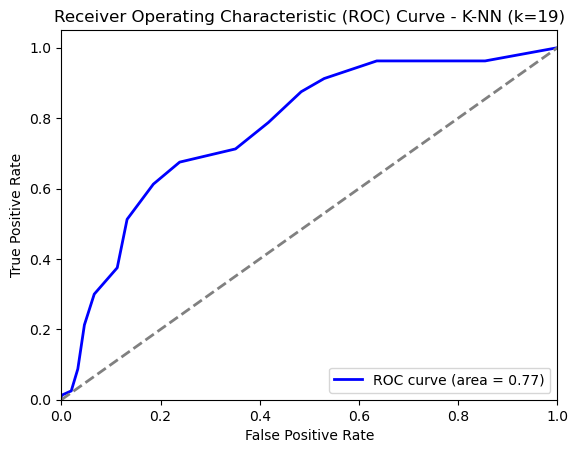

(array([[131,  20],
        [ 39,  41]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.87      0.82       151\n           1       0.67      0.51      0.58        80\n\n    accuracy                           0.74       231\n   macro avg       0.72      0.69      0.70       231\nweighted avg       0.74      0.74      0.73       231\n',
 0.7734685430463576)

In [12]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#test train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN k değeri bulma 
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_k = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# en iyi k değeri
best_k = k_values[np.argmax(accuracies)]

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)
y_pred_proba_knn = knn_classifier.predict_proba(X_test)[:, 1]

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - K-NN (k={best_k})')
plt.legend(loc="lower right")
plt.show()

conf_matrix_knn, class_report_knn, roc_auc_knn

#Veri seti %70 eğitim ve %30 test olarak bölündü. 
#En iyi k değeri belirlendi ve bu değerle K-NN sınıflandırıcı eğitildi. 
#Test verisinde tahminler yapılarak karışıklık matrisi, sınıflandırma raporu ve ROC AUC skoru hesaplandı ve ROC eğrisi çizildi.

c:\Users\Talib\anaconda3\envs\Talha\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


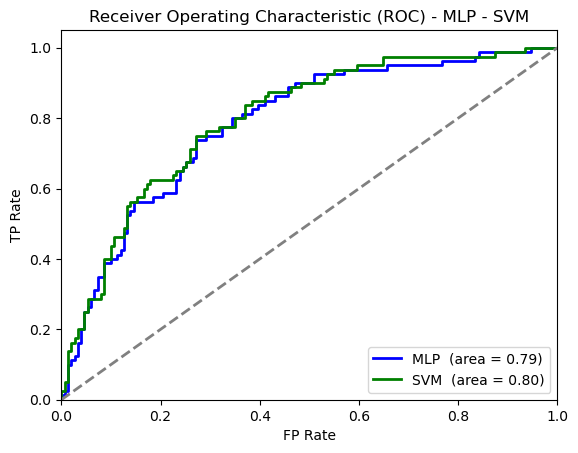

((array([[119,  32],
         [ 33,  47]], dtype=int64),
  '              precision    recall  f1-score   support\n\n           0       0.78      0.79      0.79       151\n           1       0.59      0.59      0.59        80\n\n    accuracy                           0.72       231\n   macro avg       0.69      0.69      0.69       231\nweighted avg       0.72      0.72      0.72       231\n',
  0.7855132450331126),
 (array([[125,  26],
         [ 32,  48]], dtype=int64),
  '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81       151\n           1       0.65      0.60      0.62        80\n\n    accuracy                           0.75       231\n   macro avg       0.72      0.71      0.72       231\nweighted avg       0.75      0.75      0.75       231\n',
  0.7975993377483444))

In [10]:

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Train MLP classifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=300)
mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test)[:, 1]

# MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)

# Train SVM classifier
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)
y_pred_proba_svm = svm_classifier.predict_proba(X_test)[:, 1]

# SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

# MLP ve SVM
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP  (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM  (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('Receiver Operating Characteristic (ROC) - MLP - SVM')
plt.legend(loc="lower right")
plt.show()

(conf_matrix_mlp, class_report_mlp, roc_auc_mlp), (conf_matrix_svm, class_report_svm, roc_auc_svm)


#Veri seti %70 eğitim ve %30 test olarak bölündü. 
#MLP ve SVM sınıflandırıcılar ayrı ayrı eğitildi ve test verisinde tahminler yapıldı. 
#Her iki model için de karışıklık matrisi, sınıflandırma raporu ve ROC AUC skorları hesaplanarak ROC eğrileri çizildi.